# Pymaceuticals Inc.
---

### Observations and Insights
1) There is a positive correlation (correlation coefficient of 0.84) between mouse weight and tumor volume within the Capomulin treatment cohort. 


2) 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())
merge_df.loc[merge_df['Mouse ID']=="g989" , : ]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Mouse_df=merge_df.loc[merge_df["Mouse ID"]!="g989", :]



In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Drug_Summary=Mouse_df.groupby(["Drug Regimen"]).mean()

Drug_Summary["Mean Tumor Volume"]=Mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Drug_Summary["Median Tumor Volume"]=Mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Drug_Summary["Tumor Volume Variance"]=Mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Drug_Summary["Tumor Volume Std. Dev"]=Mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Drug_Summary["Tumor Volume Std. Err"]=Mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

Drug_Summary=Drug_Summary[["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance","Tumor Volume Std. Dev", "Tumor Volume Std. Err" ]]

Drug_Summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [44]:
Drug_Summary.groupby('Drug Regimen').aggregate({'Mean Tumor Volume': 'mean',
                             'Median Tumor Volume': 'median'})

,Mean Tumor Volume,Median Tumor Volume
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


## Bar and Pie Charts

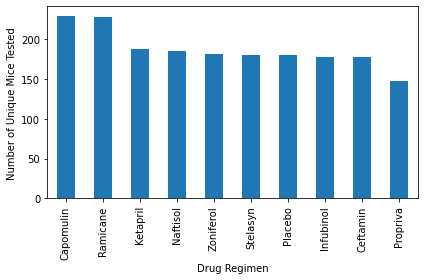

In [6]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_values=Mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()
bar_values=bar_values.sort_values(ascending=False)
bar_values.plot(kind="bar")
plt.ylabel("Number of Unique Mice Tested")
plt.tight_layout()

([<matplotlib.axis.XTick at 0x2382736e430>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

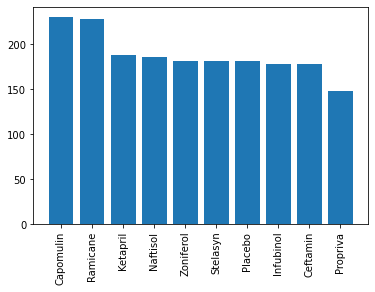

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
new_df=bar_values.reset_index()
drugs=new_df["Drug Regimen"]
x_axis = np.arange(len(new_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, bar_values)
plt.xticks(tick_locations, new_df["Drug Regimen"], rotation="vertical")

<AxesSubplot:ylabel='Sex'>

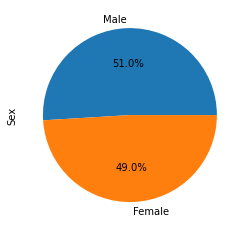

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sizes.plot(kind="pie", autopct="%1.1f%%")

Text(0.5, 1.0, 'Sex')

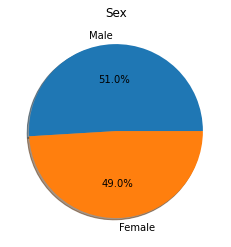

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes=Mouse_df["Sex"].value_counts()
labels=["Male", "Female"]
plt.pie(sizes, labels=labels, 
        autopct="%1.1f%%", shadow=True, startangle=0)

plt.title("Sex")


## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
Cap_df=Mouse_df.loc[Mouse_df["Drug Regimen"]=="Capomulin", :]
Ram_df=Mouse_df.loc[Mouse_df["Drug Regimen"]=="Ramicane", :]
Inf_df=Mouse_df.loc[Mouse_df["Drug Regimen"]=="Infubinol", :]
Cef_df=Mouse_df.loc[Mouse_df["Drug Regimen"]=="Ceftamin", :]

#CAPOMULIN
Cap_vol_max=Cap_df.groupby(["Mouse ID"])['Timepoint'].max()

Cap_vol_df=pd.DataFrame(Cap_vol_max)
Cap_vol_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_vol_merge = pd.merge(Cap_vol_df, Mouse_df, on=("Mouse ID","Timepoint"), how="left")
cap_vol_merge

#Statistical Analysis - Capomulin
cap_quartiles = cap_vol_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = round(cap_upperq-cap_lowerq,8)

print(f"The lower quartile of tumor volume for Capomulin is: {cap_lowerq}")
print(f"The upper quartile of tumor volume for Capomulin: {cap_upperq}")
print(f"The interquartile range of tumor volume for Capomulin: {cap_iqr}")
print(f"The the median of tumor volume for Capomulin: {cap_quartiles[0.5]} ")

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")


The lower quartile of tumor volume for Capomulin is: 32.37735684
The upper quartile of tumor volume for Capomulin: 40.1592203
The interquartile range of tumor volume for Capomulin: 7.78186346
The the median of tumor volume for Capomulin: 38.125164399999996 
Values below 20.704561649999995 could be outliers.
Values above 51.83201549 could be outliers.


In [48]:
#RAMICANE
Ram_vol_max=Ram_df.groupby(["Mouse ID"])['Timepoint'].max()

Ram_vol_df=pd.DataFrame(Ram_vol_max)
Ram_vol_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ram_vol_merge = pd.merge(Ram_vol_df, Mouse_df, on=("Mouse ID","Timepoint"), how="left")
Ram_vol_merge

# Statistical Analysis - Ramicane
Ram_quartiles = Ram_vol_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ram_lowerq = Ram_quartiles[0.25]
Ram_upperq = Ram_quartiles[0.75]
Ram_iqr = round(Ram_upperq-Ram_lowerq,8)

print(f"The lower quartile of tumor volume for Ramicane is: {Ram_lowerq}")
print(f"The upper quartile of tumor volume for Ramicane: {Ram_upperq}")
print(f"The interquartile range of tumor volume for Ramicane: {Ram_iqr}")
print(f"The the median of tumor volume for Ramicane: {Ram_quartiles[0.5]} ")

Ram_lower_bound = Ram_lowerq - (1.5*Ram_iqr)
Ram_upper_bound = Ram_upperq + (1.5*Ram_iqr)
print(f"Values below {Ram_lower_bound} could be outliers.")
print(f"Values above {Ram_upper_bound} could be outliers.")

The lower quartile of tumor volume for Ramicane is: 31.56046955
The upper quartile of tumor volume for Ramicane: 40.65900627
The interquartile range of tumor volume for Ramicane: 9.09853672
The the median of tumor volume for Ramicane: 36.56165229 
Values below 17.91266447 could be outliers.
Values above 54.306811350000004 could be outliers.


In [51]:
#Infubinol
Inf_vol_max=Inf_df.groupby(["Mouse ID"])['Timepoint'].max()

Inf_vol_df=pd.DataFrame(Inf_vol_max)
Inf_vol_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Inf_vol_merge = pd.merge(Inf_vol_df, Mouse_df, on=("Mouse ID","Timepoint"), how="left")
Inf_vol_merge["Tumor Volume (mm3)"].to_list()
Inf_vol_merge

# Statistical Analysis -Infubinol
Inf_quartiles = Inf_vol_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Inf_lowerq = Inf_quartiles[0.25]
Inf_upperq = Inf_quartiles[0.75]
Inf_iqr = round(Inf_upperq-Inf_lowerq,8)

print(f"The lower quartile of tumor volume for Infubinol is: {Inf_lowerq}")
print(f"The upper quartile of tumor volume for Infubinol: {Inf_upperq}")
print(f"The interquartile range of tumor volume for Infubinol: {Inf_iqr}")
print(f"The the median of tumor volume for Infubinol: {Inf_quartiles[0.5]} ")

Inf_lower_bound = Inf_lowerq - (1.5*Inf_iqr)
Inf_upper_bound = Inf_upperq + (1.5*Inf_iqr)
print(f"Values below {Inf_lower_bound} could be outliers.")
print(f"Values above {Inf_upper_bound} could be outliers.")

Inf_vol_merge

The lower quartile of tumor volume for Infubinol is: 54.04860769
The upper quartile of tumor volume for Infubinol: 65.52574285
The interquartile range of tumor volume for Infubinol: 11.47713516
The the median of tumor volume for Infubinol: 60.16518046 
Values below 36.83290495 could be outliers.
Values above 82.74144559 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28
5,c326,5,36.321346,0,Infubinol,Female,18,25
6,c895,30,60.969711,2,Infubinol,Female,7,29
7,e476,45,62.435404,1,Infubinol,Male,23,26
8,f345,45,60.918767,1,Infubinol,Male,23,26
9,i386,40,67.289621,4,Infubinol,Female,23,29


In [50]:
#Ceftamin
Cef_vol_max=Cef_df.groupby(["Mouse ID"])['Timepoint'].max()

Cef_vol_df=pd.DataFrame(Cef_vol_max)
Cef_vol_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Cef_vol_merge = pd.merge(Cef_vol_df, Mouse_df, on=("Mouse ID","Timepoint"), how="left")
Cef_vol_merge["Tumor Volume (mm3)"].to_list()
Cef_vol_merge

# Statistical Analysis - Ceftamin
Cef_quartiles = Cef_vol_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Cef_lowerq = Cef_quartiles[0.25]
Cef_upperq = Cef_quartiles[0.75]
Cef_iqr = round(Cef_upperq-Cef_lowerq,8)

print(f"The lower quartile of tumor volume for Ceftamin is: {Cef_lowerq}")
print(f"The upper quartile of tumor volume for Ceftamin: {Cef_upperq}")
print(f"The interquartile range of tumor volume for Ceftamin: {Cef_iqr}")
print(f"The the median of tumor volume for Ceftamin: {Cef_quartiles[0.5]} ")

Cef_lower_bound = Cef_lowerq - (1.5*Cef_iqr)
Cef_upper_bound = Cef_upperq + (1.5*Inf_iqr)
print(f"Values below {Cef_lower_bound} could be outliers.")
print(f"Values above {Cef_upper_bound} could be outliers.")

The lower quartile of tumor volume for Ceftamin is: 48.72207785
The upper quartile of tumor volume for Ceftamin: 64.29983003
The interquartile range of tumor volume for Ceftamin: 15.57775218
The the median of tumor volume for Ceftamin: 59.85195552 
Values below 25.35544958 could be outliers.
Values above 81.51553277 could be outliers.


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


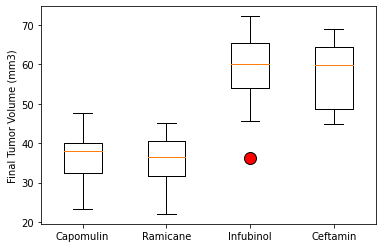

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

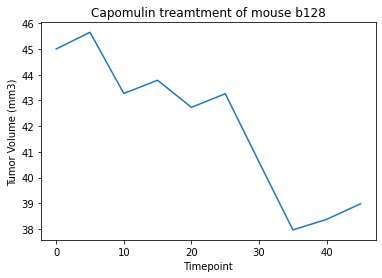

In [13]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Arbitrarily selecting Mouse Id: b128 treated with Capomulin
Mouse_b128_df=Cap_df.loc[Cap_df["Mouse ID"]=="b128", ["Timepoint", "Tumor Volume (mm3)"]]

x_axis=Mouse_b128_df["Timepoint"]
y_axis=Mouse_b128_df["Tumor Volume (mm3)"]
x_axis
plt.plot(x_axis, y_axis)
plt.title("Capomulin treamtment of mouse b128")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

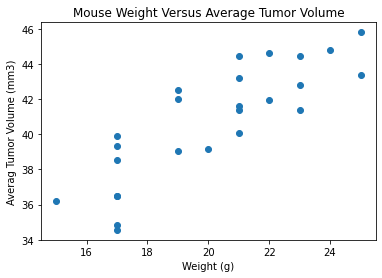

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Average_tumor_vol=Cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
Weight_cap_mouse=Cap_df.groupby(["Mouse ID"])["Weight (g)"].unique()

Weight_df=pd.DataFrame(Average_tumor_vol)
Weight_df["Weight"]=Weight_cap_mouse.str[0]

plt.scatter(Weight_df["Weight"], Weight_df["Tumor Volume (mm3)"])
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =12)
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =10)


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

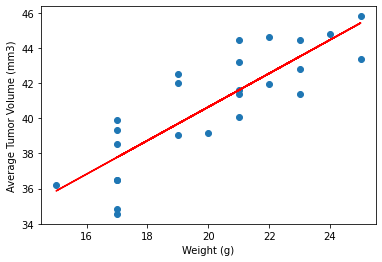

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Weight_df["Weight"],Weight_df["Tumor Volume (mm3)"])

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err = stats.linregress(Weight_df["Weight"], Weight_df["Tumor Volume (mm3)"])
mouse_fit = mouse_slope * Weight_df["Weight"] + mouse_int

plt.scatter(Weight_df["Weight"], Weight_df["Tumor Volume (mm3)"])
plt.plot(Weight_df["Weight"],mouse_fit, color="r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
